### set data

In [1]:
%matplotlib inline
from keras_pack import *
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

In [2]:
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils

X = X.reshape(400, 64, 64)

X_train0, X_test0 = train_test_split(X, test_size = .2, random_state=0)
y_train0, y_test0= train_test_split(y, test_size = .2, random_state=0)

X_train = X_train0[:, :,  :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

/home/mk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(320, 64, 64, 1) float32


### modeling

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam, Adadelta
from keras import regularizers

class CNN(Sequential):
      def __init__(self):
        super().__init__() # Sequential init  상속
        self.add(Conv2D(4, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same',kernel_initializer="glorot_uniform"))
        self.add(MaxPooling2D()) # 사이즈 줄임
        self.add(Dropout(0.1))
        self.add(Flatten()) # 벡터로 
        self.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform")) # softmax 대신 sigmoid같은것도 가능
        self.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam())

In [4]:
model = CNN()

In [8]:
%%time
hist = model.fit(X_train, Y_train, epochs=300, batch_size=150, validation_data=(X_test, Y_test), verbose=0)

CPU times: user 11min 38s, sys: 1min 2s, total: 12min 41s
Wall time: 4min 48s


In [9]:
model.evaluate(X_test, Y_test)

80/80 [==============================] - 0s 1ms/step


[1.6949573040008545, 0.8375]

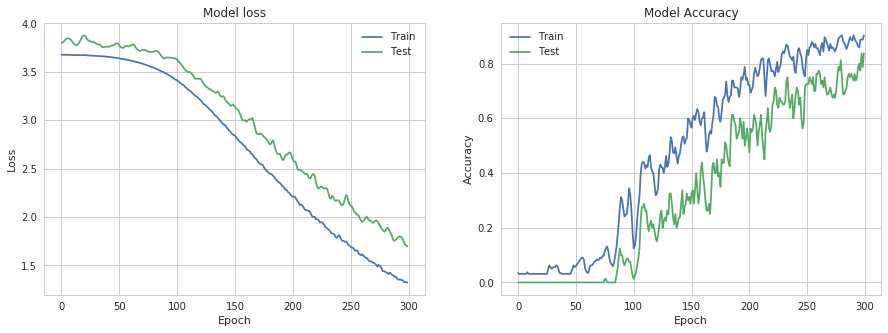

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_loss(hist)
plt.subplot(122)
plot_acc(hist)